In [1]:
import os
import mlflow
from mlflow_utils import get_mlflow_experiment

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [2]:
# conectar con mlflow y minio
mlflow.set_tracking_uri("http://127.0.0.1:5000")

os.environ['MLFLOW_S3_ENDPOINT_URL'] = "http://127.0.0.1:9000"
os.environ['AWS_ACCESS_KEY_ID'] = 'admin'
os.environ['AWS_SECRET_ACCESS_KEY'] = 'supersecret'

Name: testing_mlflow


PermissionError: [Errno 13] Permission denied: '/mlflow'

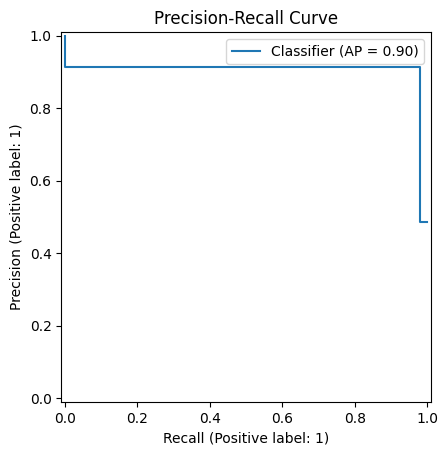

In [3]:
experiment = get_mlflow_experiment(experiment_name="testing_mlflow")
print("Name: {}".format(experiment.name))

with mlflow.start_run(run_name="logging_images", experiment_id=experiment.experiment_id) as run:

    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

    rfc = RandomForestClassifier(n_estimators=100, random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)

    # log the precision-recall curve
    fig_pr = plt.figure()
    pr_display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, ax=plt.gca())
    plt.title("Precision-Recall Curve")
    plt.legend()

    mlflow.log_figure(fig_pr, "metrics/precision_recall_curve.png")

    # log the ROC curve
    fig_roc = plt.figure()
    roc_display = RocCurveDisplay.from_predictions(y_test, y_pred, ax=plt.gca())
    plt.title("ROC Curve")
    plt.legend()

    mlflow.log_figure(fig_roc, "metrics/roc_curve.png")

    # log the confusion matrix
    fig_cm = plt.figure()
    cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=plt.gca())
    plt.title("Confusion Matrix")
    plt.legend()

    mlflow.log_figure(fig_cm, "metrics/confusion_matrix.png")

    # print info about the run
    print("run_id: {}".format(run.info.run_id))
    print("experiment_id: {}".format(run.info.experiment_id))
    print("status: {}".format(run.info.status))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

Me genero un error, conexion entre mlflow y minio

In [ ]:
print('Ok_')